In [3]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


##### Load GEBCO 2023 datasets

In [4]:
ds = xr.open_dataset('/media/metwally/Data/OceanTwin/gebco2023/gebco_2023_sub_ice_topo/GEBCO_2023_sub_ice_topo.nc')
tid = xr.open_dataset('/media/metwally/Data/OceanTwin/gebco2023/gebco_2023_tid/GEBCO_2023_TID.nc')


##### Define the bounding box for your region of interest

In [5]:
lat_min = 25
lon_min = -15
lat_max = 66.0
lon_max = 40.0

# Create a condition to mask data outside of your region of interest
cond = (ds.lat>lat_min) & (ds.lat<lat_max) & (ds.lon>lon_min) & (ds.lon<lon_max)
masked_ds = ds.where(cond, drop=True)
masked_tid = tid.where(cond, drop=True)

In [6]:
# Create a land-sea mask an Mask the elevation data
land_sea_mask = masked_tid.tid == 0
masked_elv= np.ma.masked_where(land_sea_mask, masked_ds['elevation'])
lon_grid, lat_grid=np.meshgrid(masked_ds['elevation'].lon, masked_ds['elevation'].lat)

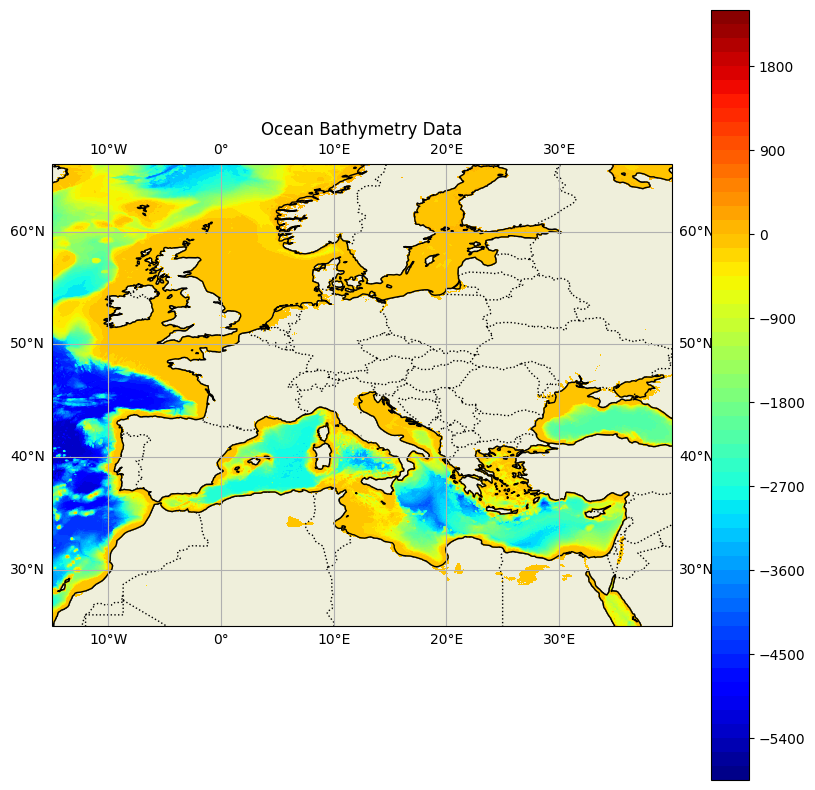

In [7]:
# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Create a figure and axes
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 10))

# Plot the bathymetry data
c = ax.contourf(masked_ds.lon, masked_ds.lat, masked_elv, levels=75, transform=projection, cmap='jet')

# Add coastlines and other map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Set plot extent based on the bounding box
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical') #, label='Bathymetry (meters)'

# Set plot title
plt.title('Ocean Bathymetry Data')

# Show the plot
plt.show()